Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


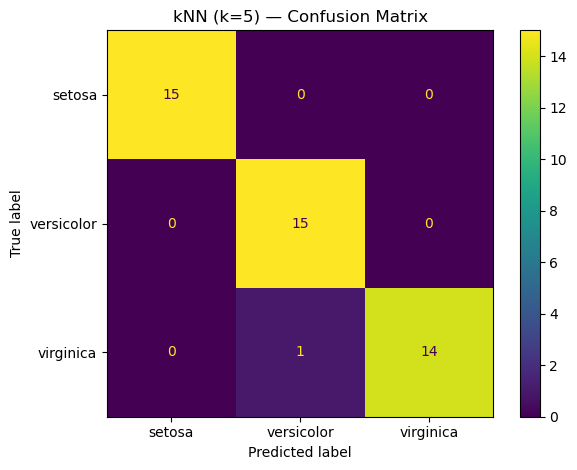


Accuracy: 0.9777777777777777

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



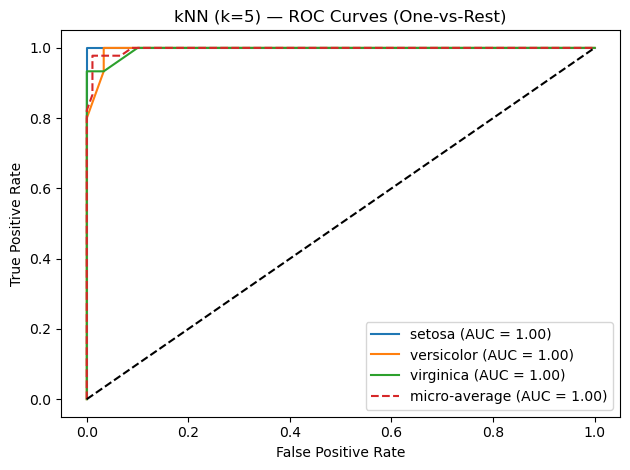


Macro-average AUC: 0.997
Micro-average AUC: 0.997


In [3]:
# Q9 — Performance Evaluation Programming (kNN on Iris, k=5)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, accuracy_score,
    roc_curve, auc
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# 1) Load data and train kNN (k=5)
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# 2) Confusion matrix (compute & display)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(values_format="d")
plt.title("kNN (k=5) — Confusion Matrix")
plt.tight_layout()
plt.show()

# 3) Accuracy, Precision, Recall, F1
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n",
      classification_report(y_test, y_pred, target_names=iris.target_names))

# 4) ROC curves (one-vs-rest) + AUC
# Binarize labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Predict class probabilities
y_score = knn.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average (aggregates contributions of all classes)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average (average AUC across classes)
roc_auc["macro"] = np.mean([roc_auc[i] for i in range(n_classes)])

# Plot ROC curves
plt.figure()
for i, name in enumerate(iris.target_names):
    plt.plot(fpr[i], tpr[i], label=f"{name} (AUC = {roc_auc[i]:.2f})")
plt.plot(fpr["micro"], tpr["micro"], linestyle="--", label=f"micro-average (AUC = {roc_auc['micro']:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("kNN (k=5) — ROC Curves (One-vs-Rest)")
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nMacro-average AUC: {roc_auc['macro']:.3f}")
print(f"Micro-average AUC: {roc_auc['micro']:.3f}")
